In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D, LayerNormalization, Softmax
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
import tensorflow_probability as tfp
import keras

In [2]:
#training, testing = tf.keras.datasets.mnist.load_data(path="mnist.npz")
training, testing = tf.keras.datasets.mnist.load_data()



images_training = training[0]/256
images_testing = testing[0]/256

labels_training = pd.get_dummies(training[1]).to_numpy()
labels_testing = pd.get_dummies(testing[1]).to_numpy()

In [3]:
#Sperate digit

remove = 3

images_training_main = images_training[training[1]!=remove]
images_training_alien = images_training[training[1]==remove]

images_testing_main = images_testing[testing[1]!=remove]
images_testing_alien = images_testing[testing[1]==remove]

labels_training_main = labels_training[training[1]!=remove]
labels_training_alien = labels_training[training[1]==remove]

labels_testing_main = labels_testing[testing[1]!=remove]
labels_testing_alien = labels_testing[testing[1]==remove]


In [4]:
def generate_gaussian_noise(images,noise_sd):
    #Adds random gaussian noise to images
    noisy_images = images + np.random.normal(0,noise_sd,np.shape(images))
    return noisy_images


def generate_contrast(images,a):
    
    contrasted_images = np.zeros(np.shape(images))
    #changes contrast based on alpha
    alpha = a
    for i in range(np.shape(images)[0]):
        for j in range(np.shape(images)[1]):
            for k in range(np.shape(images)[2]):
                if images[i,j,k] < 0.5:
                    contrasted_images[i,j,k] = 0.5*(2*images[i,j,k])**alpha
                    
                else:
                    contrasted_images[i,j,k] = 1 - 0.5*(2*(1-images[i,j,k]))**alpha
    
    return contrasted_images

def generate_pixel_dropout(images,dropout, replace=0.5):
    dropout_images = np.zeros(np.shape(images))

    for i in range(np.shape(images)[0]):
        for j in range(np.shape(images)[1]):
            for k in range(np.shape(images)[2]):
                if np.random.rand(1,)[0] < dropout:
                    dropout_images[i,j,k] = replace
                else:
                    dropout_images[i,j,k] = images[i,j,k]                       
                    
     
    
    return dropout_images

def display_images(images,n=10):
    #Displays first n images
    plt.figure(10000)
    fig, ax = plt.subplots(1,n,figsize=(15,15))
    for i in range(n):
        ax[i].imshow(images[i])  
    plt.show()
    
def compute_accuracy(actual_labels, predicted_labels):
    c = 0
    for i in range(len(actual_labels[:,0])):
        if np.argmax(actual_labels[i,:]) == np.argmax(predicted_labels[i,:]):
            c = c+1
            
    return c/len(actual_labels[:,0])
        
def compute_confidence(actual_labels, predicted_labels):
    c = 0
    all_conf = 0 
    correct_conf = 0
    for i in range(len(actual_labels[:,0])):
        if np.argmax(actual_labels[i,:]) == np.argmax(predicted_labels[i,:]):
            c = c+1
            correct_conf = predicted_labels[i,np.argmax(predicted_labels[i,:])] + correct_conf
        all_conf = predicted_labels[i,np.argmax(predicted_labels[i,:])] + all_conf
        
    all_conf = all_conf/len(actual_labels[:,0])
    
    try:
        correct_conf = correct_conf/c
    except:
        correct_conf = "Alien"
        
    
    return all_conf,correct_conf

def compute_frequencies(predicted_labels):
    freq = np.zeros((10,1))
    for i in range(len(predicted_labels[:,0])): 
        freq[np.argmax(predicted_labels[i,:]),0] = 1 + freq[np.argmax(predicted_labels[i,:]),0]
        
    freq = freq/len(predicted_labels[:,0])
        
    return freq
        
    
def compute_confidence_by_category(actual_labels, predicted_labels):
    c = np.zeros((10,1))
    cc = np.zeros((10,1))
    all_conf = np.zeros((10,1))
    correct_conf = np.zeros((10,1))
    
    for j in range(10):
        for i in range(len(actual_labels[:,0])):
            if np.argmax(predicted_labels[i,:]) == j:
                cc[j] = cc[j] + 1
                if np.argmax(actual_labels[i,:]) == np.argmax(predicted_labels[i,:]):
                    c[j] = c[j]+1
                    correct_conf[j] = predicted_labels[i,np.argmax(predicted_labels[i,:])] + correct_conf[j]
                all_conf[j] = predicted_labels[i,np.argmax(predicted_labels[i,:])] + all_conf[j]

        all_conf[j] = all_conf[j]/cc[j]
        correct_conf[j] = correct_conf[j]/c[j]
    
    return all_conf,correct_conf

Clean Data


<Figure size 432x288 with 0 Axes>

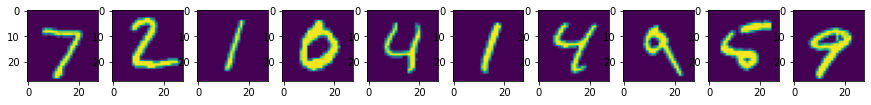

Noisy Data


<Figure size 432x288 with 0 Axes>

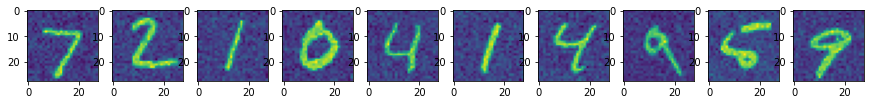

<Figure size 432x288 with 0 Axes>

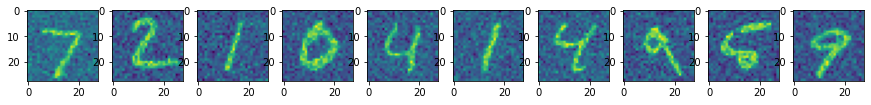

<Figure size 432x288 with 0 Axes>

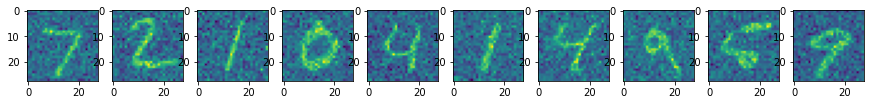

<Figure size 432x288 with 0 Axes>

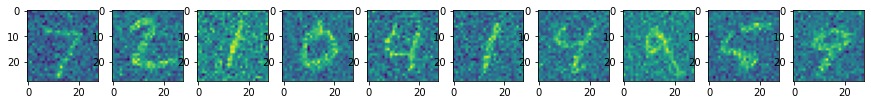

<Figure size 432x288 with 0 Axes>

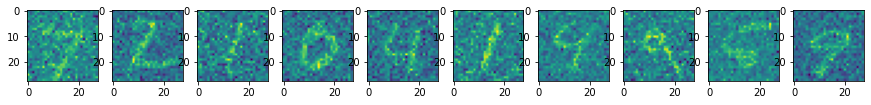

<Figure size 432x288 with 0 Axes>

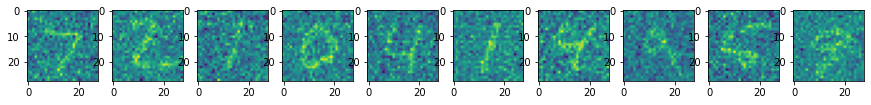

<Figure size 432x288 with 0 Axes>

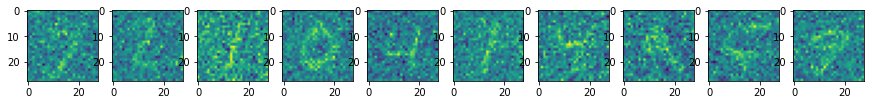

<Figure size 432x288 with 0 Axes>

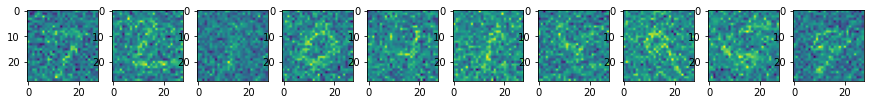

<Figure size 432x288 with 0 Axes>

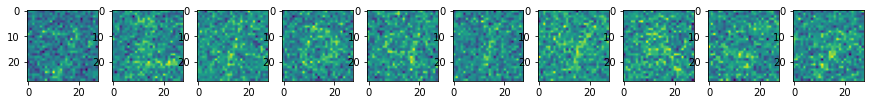

<Figure size 432x288 with 0 Axes>

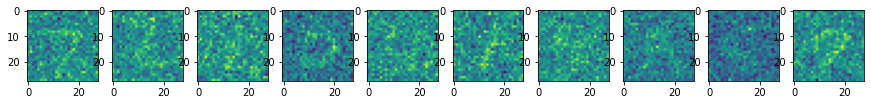

<Figure size 432x288 with 0 Axes>

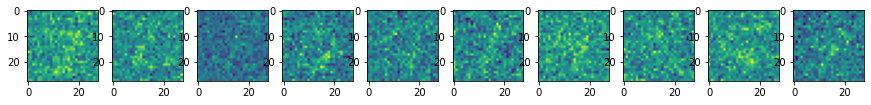

<Figure size 432x288 with 0 Axes>

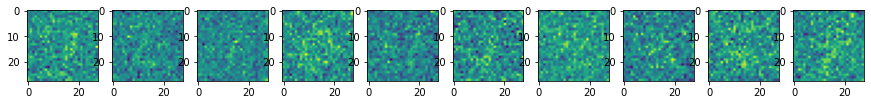

<Figure size 432x288 with 0 Axes>

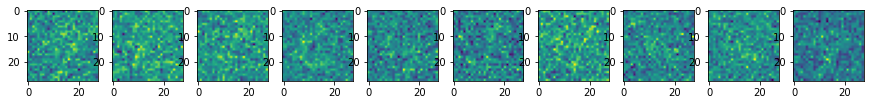

<Figure size 432x288 with 0 Axes>

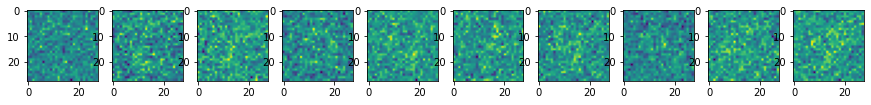

<Figure size 432x288 with 0 Axes>

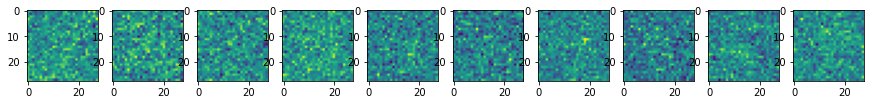

<Figure size 432x288 with 0 Axes>

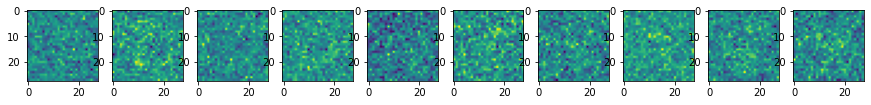

<Figure size 432x288 with 0 Axes>

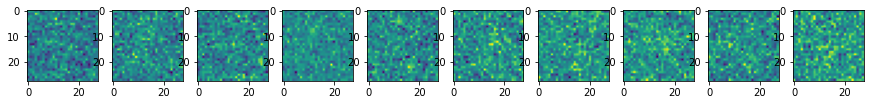

<Figure size 432x288 with 0 Axes>

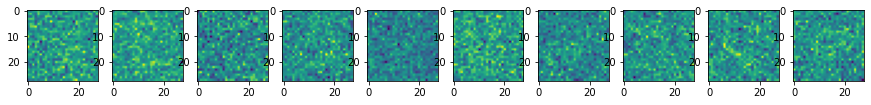

<Figure size 432x288 with 0 Axes>

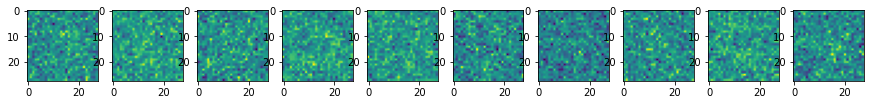

In [6]:
#Display clean data
print("Clean Data")
display_images(images_testing)

print("Noisy Data")
sd_test = np.arange(0.1,2,0.1)
for i in range(len(sd_test)):
    noisy_testing = generate_gaussian_noise(images_testing,sd_test[i])
    
    display_images(noisy_testing)
  

Contrast Data


<Figure size 432x288 with 0 Axes>

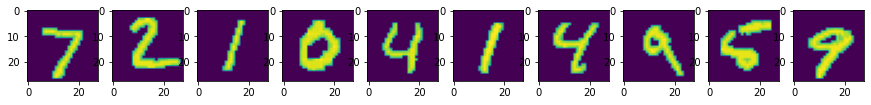

<Figure size 432x288 with 0 Axes>

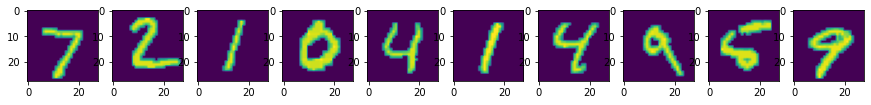

<Figure size 432x288 with 0 Axes>

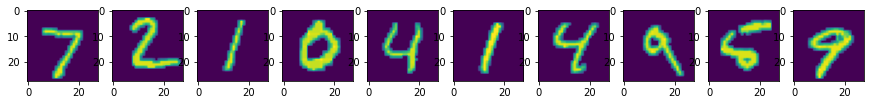

<Figure size 432x288 with 0 Axes>

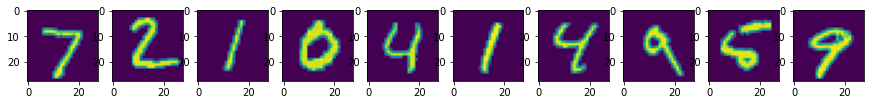

<Figure size 432x288 with 0 Axes>

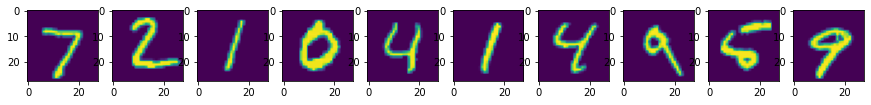

<Figure size 432x288 with 0 Axes>

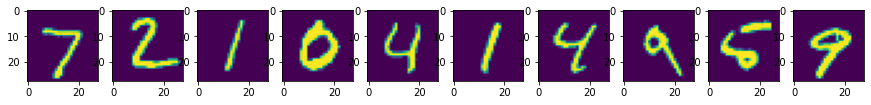

<Figure size 432x288 with 0 Axes>

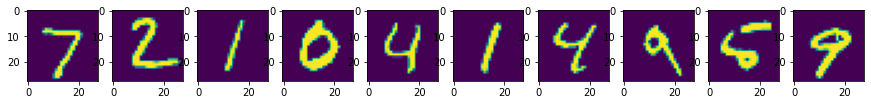

<Figure size 432x288 with 0 Axes>

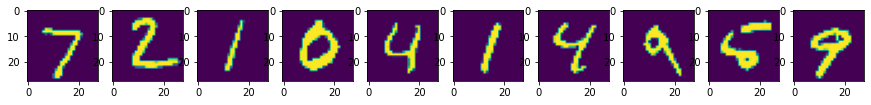

In [7]:
#Display contrast data


print("Contrast Data")
cn_test = [0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4]
for i in range(len(cn_test)):
    noisy_testing = generate_contrast(images_testing,cn_test[i])
    
    display_images(noisy_testing)
  

Dropout Data


<Figure size 432x288 with 0 Axes>

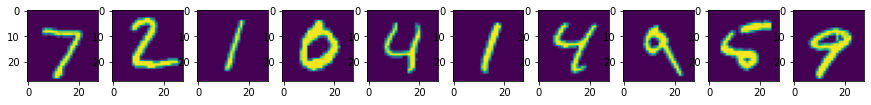

<Figure size 432x288 with 0 Axes>

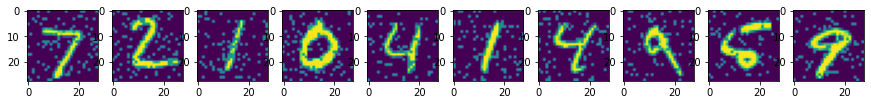

<Figure size 432x288 with 0 Axes>

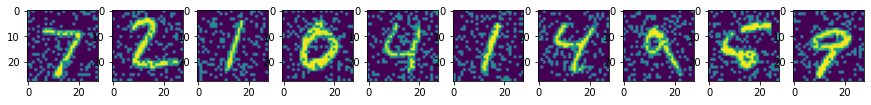

<Figure size 432x288 with 0 Axes>

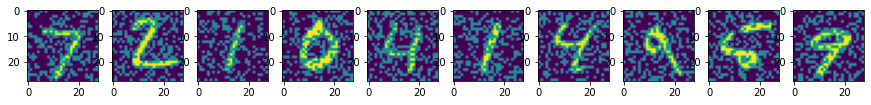

<Figure size 432x288 with 0 Axes>

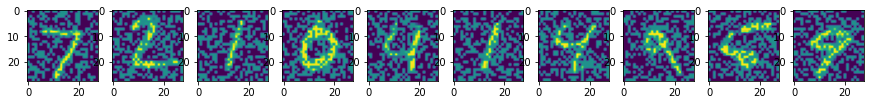

<Figure size 432x288 with 0 Axes>

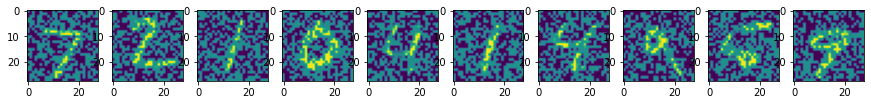

KeyboardInterrupt: 

In [8]:
print("Dropout Data")
sd_test = np.arange(0,1,0.1)
for i in range(len(sd_test)):
    noisy_testing = generate_pixel_dropout(images_testing,sd_test[i])
    
    display_images(noisy_testing)

# Experiment 1a: Tiny Feedforward Network

In [15]:
#Train standard feedforward model

images_training_flat = images_training_main.reshape(np.shape(images_training_main)[0],784)

inputs = Input(shape=(784))
layer = Dense(10,activation='relu')(inputs)


outputs = Dense(10,activation='softmax')(layer)

model_feedforward = Model(inputs=inputs,outputs=outputs)

model_feedforward_intermed = Model(inputs=inputs,outputs=layer)

model_feedforward.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_feedforward.fit(images_training_flat,labels_training_main,batch_size=100,verbose = 0, epochs=500,validation_split=0.33,callbacks=[es])


Epoch 44: early stopping


32/32 [==============================] - 0s 567us/step


<Figure size 432x288 with 0 Axes>

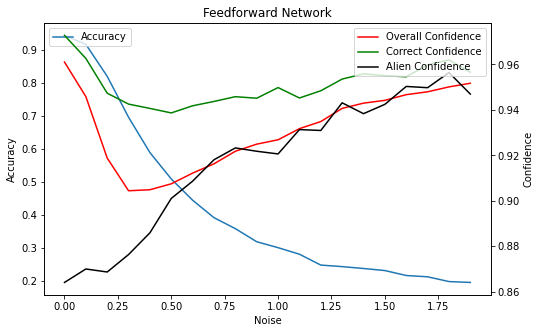

In [19]:
# Vary noise


sd_test = np.arange(0,2,.1)

all_conf_array_main = []
all_conf_array_alien = []

correct_conf_array_main = []

acc_array = []




for i in range(len(sd_test)):
    images_testing_noise_main = generate_gaussian_noise(images_testing_main,sd_test[i])
    images_testing_noise_flat_main = images_testing_noise_main.reshape(np.shape(images_testing_noise_main)[0],784)
    labels_testing_predicted_main = model_feedforward.predict(images_testing_noise_flat_main)
    
    all_conf_main,correct_conf_main = compute_confidence(labels_testing_main,labels_testing_predicted_main)
    
    images_testing_noise_alien = generate_gaussian_noise(images_testing_alien,sd_test[i])
    images_testing_noise_flat_alien = images_testing_noise_alien.reshape(np.shape(images_testing_noise_alien)[0],784)
    labels_testing_predicted_alien = model_feedforward.predict(images_testing_noise_flat_alien)
    
    all_conf_alien,correct_conf_alien = compute_confidence(labels_testing_alien,labels_testing_predicted_alien)
    
  
    
    acc = compute_accuracy(labels_testing_main,labels_testing_predicted_main)
    
    all_conf_array_main.append(all_conf_main)
    all_conf_array_alien.append(all_conf_alien)
    correct_conf_array_main.append(correct_conf_main)   
    acc_array.append(acc)
    

    



plt.figure(1)
fig, acc_ax = plt.subplots(figsize=(8,5))
conf_ax = acc_ax.twinx()
acc_ax.set_xlabel("Noise")
acc_ax.set_ylabel("Accuracy")
conf_ax.set_ylabel("Confidence")
acc_ax.plot(sd_test,acc_array, label = "Accuracy")
conf_ax.plot(sd_test,all_conf_array_main, label = "Overall Confidence",color='r')
conf_ax.plot(sd_test,correct_conf_array_main, label = "Correct Confidence",color='g')
conf_ax.plot(sd_test,all_conf_array_alien, label = "Alien Confidence",color='k')
plt.title("Feedforward Network")
conf_ax.legend(loc= "upper right")
acc_ax.legend(loc= "upper left")
plt.show()



# Experiment 1b: Tiny Feedforward Network with Hidden Layer normalization

In [20]:
#Train standard feedforward model

images_training_flat = images_training.reshape(np.shape(images_training)[0],784)

inputs = Input(shape=(784))
layer = Dense(10,activation='relu')(inputs)

layer = LayerNormalization()(layer)
outputs = Dense(10,activation='softmax')(layer)

model_feedforward = Model(inputs=inputs,outputs=outputs)

model_feedforward_intermed = Model(inputs=inputs,outputs=layer)

model_feedforward.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_feedforward.fit(images_training_flat,labels_training,batch_size=100,verbose = 0, epochs=500,validation_split=0.33,callbacks=[es])


Epoch 38: early stopping


32/32 [==============================] - 0s 656us/step


<Figure size 432x288 with 0 Axes>

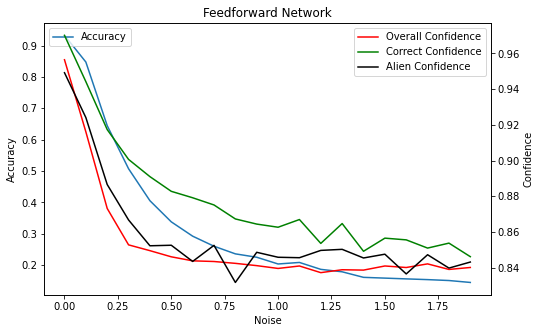

In [21]:
# Vary noise


sd_test = np.arange(0,2,.1)

all_conf_array_main = []
all_conf_array_alien = []

correct_conf_array_main = []

acc_array = []




for i in range(len(sd_test)):
    images_testing_noise_main = generate_gaussian_noise(images_testing_main,sd_test[i])
    images_testing_noise_flat_main = images_testing_noise_main.reshape(np.shape(images_testing_noise_main)[0],784)
    labels_testing_predicted_main = model_feedforward.predict(images_testing_noise_flat_main)
    
    all_conf_main,correct_conf_main = compute_confidence(labels_testing_main,labels_testing_predicted_main)
    
    images_testing_noise_alien = generate_gaussian_noise(images_testing_alien,sd_test[i])
    images_testing_noise_flat_alien = images_testing_noise_alien.reshape(np.shape(images_testing_noise_alien)[0],784)
    labels_testing_predicted_alien = model_feedforward.predict(images_testing_noise_flat_alien)
    
    all_conf_alien,correct_conf_alien = compute_confidence(labels_testing_alien,labels_testing_predicted_alien)
    
  
    
    acc = compute_accuracy(labels_testing_main,labels_testing_predicted_main)
    
    all_conf_array_main.append(all_conf_main)
    all_conf_array_alien.append(all_conf_alien)
    correct_conf_array_main.append(correct_conf_main)   
    acc_array.append(acc)
    

    



plt.figure(1)
fig, acc_ax = plt.subplots(figsize=(8,5))
conf_ax = acc_ax.twinx()
acc_ax.set_xlabel("Noise")
acc_ax.set_ylabel("Accuracy")
conf_ax.set_ylabel("Confidence")
acc_ax.plot(sd_test,acc_array, label = "Accuracy")
conf_ax.plot(sd_test,all_conf_array_main, label = "Overall Confidence",color='r')
conf_ax.plot(sd_test,correct_conf_array_main, label = "Correct Confidence",color='g')
conf_ax.plot(sd_test,all_conf_array_alien, label = "Alien Confidence",color='k')
plt.title("Feedforward Network")
conf_ax.legend(loc= "upper right")
acc_ax.legend(loc= "upper left")
plt.show()



# Experiment 1c: Tiny Feedforward Network with First Layer normalization

In [22]:
#Train standard feedforward model

images_training_flat = images_training.reshape(np.shape(images_training)[0],784)

inputs = Input(shape=(784))

layer = LayerNormalization()(inputs)

layer = Dense(10,activation='relu')(layer)


outputs = Dense(10,activation='softmax')(layer)


model_feedforward = Model(inputs=inputs,outputs=outputs)

model_feedforward_intermed = Model(inputs=inputs,outputs=layer)

model_feedforward.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_feedforward.fit(images_training_flat,labels_training,batch_size=100,verbose = 0, epochs=500,validation_split=0.33,callbacks=[es])


Epoch 28: early stopping


32/32 [==============================] - 0s 837us/step


<Figure size 432x288 with 0 Axes>

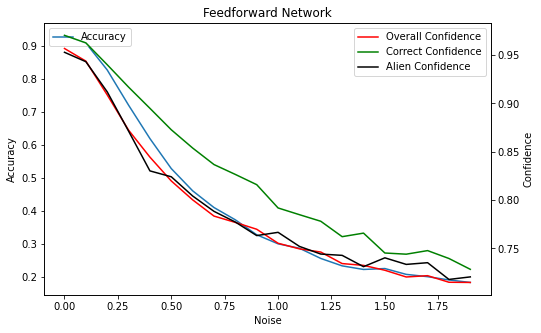

In [23]:
# Vary noise


sd_test = np.arange(0,2,.1)

all_conf_array_main = []
all_conf_array_alien = []

correct_conf_array_main = []

acc_array = []




for i in range(len(sd_test)):
    images_testing_noise_main = generate_gaussian_noise(images_testing_main,sd_test[i])
    images_testing_noise_flat_main = images_testing_noise_main.reshape(np.shape(images_testing_noise_main)[0],784)
    labels_testing_predicted_main = model_feedforward.predict(images_testing_noise_flat_main)
    
    all_conf_main,correct_conf_main = compute_confidence(labels_testing_main,labels_testing_predicted_main)
    
    images_testing_noise_alien = generate_gaussian_noise(images_testing_alien,sd_test[i])
    images_testing_noise_flat_alien = images_testing_noise_alien.reshape(np.shape(images_testing_noise_alien)[0],784)
    labels_testing_predicted_alien = model_feedforward.predict(images_testing_noise_flat_alien)
    
    all_conf_alien,correct_conf_alien = compute_confidence(labels_testing_alien,labels_testing_predicted_alien)
    
  
    
    acc = compute_accuracy(labels_testing_main,labels_testing_predicted_main)
    
    all_conf_array_main.append(all_conf_main)
    all_conf_array_alien.append(all_conf_alien)
    correct_conf_array_main.append(correct_conf_main)   
    acc_array.append(acc)
    

    



plt.figure(1)
fig, acc_ax = plt.subplots(figsize=(8,5))
conf_ax = acc_ax.twinx()
acc_ax.set_xlabel("Noise")
acc_ax.set_ylabel("Accuracy")
conf_ax.set_ylabel("Confidence")
acc_ax.plot(sd_test,acc_array, label = "Accuracy")
conf_ax.plot(sd_test,all_conf_array_main, label = "Overall Confidence",color='r')
conf_ax.plot(sd_test,correct_conf_array_main, label = "Correct Confidence",color='g')
conf_ax.plot(sd_test,all_conf_array_alien, label = "Alien Confidence",color='k')
plt.title("Feedforward Network")
conf_ax.legend(loc= "upper right")
acc_ax.legend(loc= "upper left")
plt.show()



# Experiment 1c: Tiny Feedforward Network with Last Layer normalization

In [5]:
#Train standard feedforward model

images_training_flat = images_training.reshape(np.shape(images_training)[0],784)

inputs = Input(shape=(784))
layer = Dense(10,activation='relu')(inputs)


output = Dense(10,activation='linear')(layer)

output_norm = LayerNormalization()(output)

outputs = tf.keras.layers.Softmax()(output_norm)

model_feedforward = Model(inputs=inputs,outputs=outputs)

model_feedforward_before_softmax = Model(inputs=inputs,outputs=output)
model_feedforward_intermed = Model(inputs=inputs,outputs=layer)

model_feedforward.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_feedforward.fit(images_training_flat,labels_training,batch_size=100,verbose = 0, epochs=500,validation_split=0.33,callbacks=[es])


Epoch 45: early stopping


32/32 [==============================] - 0s 1ms/step


<Figure size 432x288 with 0 Axes>

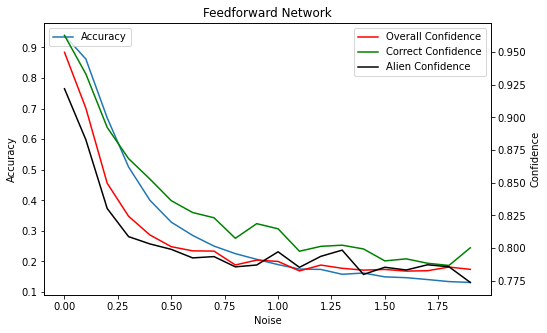

In [6]:
# Vary noise


sd_test = np.arange(0,2,.1)

all_conf_array_main = []
all_conf_array_alien = []

correct_conf_array_main = []

acc_array = []




for i in range(len(sd_test)):
    images_testing_noise_main = generate_gaussian_noise(images_testing_main,sd_test[i])
    images_testing_noise_flat_main = images_testing_noise_main.reshape(np.shape(images_testing_noise_main)[0],784)
    labels_testing_predicted_main = model_feedforward.predict(images_testing_noise_flat_main)
    
    all_conf_main,correct_conf_main = compute_confidence(labels_testing_main,labels_testing_predicted_main)
    
    images_testing_noise_alien = generate_gaussian_noise(images_testing_alien,sd_test[i])
    images_testing_noise_flat_alien = images_testing_noise_alien.reshape(np.shape(images_testing_noise_alien)[0],784)
    labels_testing_predicted_alien = model_feedforward.predict(images_testing_noise_flat_alien)
    
    all_conf_alien,correct_conf_alien = compute_confidence(labels_testing_alien,labels_testing_predicted_alien)
    
  
    
    acc = compute_accuracy(labels_testing_main,labels_testing_predicted_main)
    
    all_conf_array_main.append(all_conf_main)
    all_conf_array_alien.append(all_conf_alien)
    correct_conf_array_main.append(correct_conf_main)   
    acc_array.append(acc)
    

    



plt.figure(1)
fig, acc_ax = plt.subplots(figsize=(8,5))
conf_ax = acc_ax.twinx()
acc_ax.set_xlabel("Noise")
acc_ax.set_ylabel("Accuracy")
conf_ax.set_ylabel("Confidence")
acc_ax.plot(sd_test,acc_array, label = "Accuracy")
conf_ax.plot(sd_test,all_conf_array_main, label = "Overall Confidence",color='r')
conf_ax.plot(sd_test,correct_conf_array_main, label = "Correct Confidence",color='g')
conf_ax.plot(sd_test,all_conf_array_alien, label = "Alien Confidence",color='k')
plt.title("Feedforward Network")
conf_ax.legend(loc= "upper right")
acc_ax.legend(loc= "upper left")
plt.show()

